# Using Neural Network Predict the gender given the name

Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

Reading data from csv file stored in github

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
df_male = pd.read_csv("https://gist.githubusercontent.com/mbejda/7f86ca901fe41bc14a63/raw/38adb475c14a3f44df9999c1541f3a72f472b30d/Indian-Male-Names.csv")
df_female = pd.read_csv("https://gist.githubusercontent.com/mbejda/9b93c7545c9dd93060bd/raw/b582593330765df3ccaae6f641f8cddc16f1e879/Indian-Female-Names.csv")

Extracting required columns i.e name and gender

In [4]:
df = pd.concat([df_male,df_female])
data = df[['name','gender']].values
x = data[:,:-1]
y = data[:,1:]
print(x)
print(y)

[['barjraj']
 ['ramdin verma']
 ['sharat chandran']
 ...
 ['manju d/0 baboo lal jatav']
 ['shivani']
 ['nayna']]
[['m']
 ['m']
 ['m']
 ...
 ['f']
 ['f']
 ['f']]


Data Visualization:

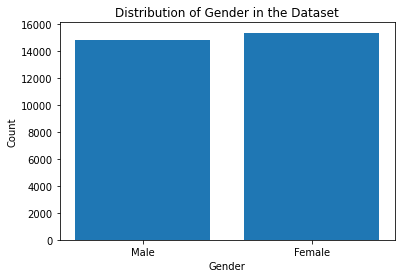

In [5]:
gender_count={"Male":np.count_nonzero(y=='m'),"Female":np.count_nonzero(y=='f')}
# Plot the distribution of genders
plt.bar(gender_count.keys(), gender_count.values())
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender in the Dataset')
plt.show()

As some names may contain full name, splitting to get just first name

In [6]:
# Define a function to extract the first name
def extract_first_name(full_name):
    return str(full_name).split()[0]

# Convert elements to strings and apply the function to each element in the array
x = np.vectorize(extract_first_name, otypes=[str])(x)
print(x)
print(y)

[['barjraj']
 ['ramdin']
 ['sharat']
 ...
 ['manju']
 ['shivani']
 ['nayna']]
[['m']
 ['m']
 ['m']
 ...
 ['f']
 ['f']
 ['f']]


Calculate the name with maximum length

In [7]:
def get_max_length(names):
    max_length = max(len(name) for name in names)
    return max_length

max_length = get_max_length(x.reshape(-1))
print("Maximum Length: ",max_length)

Maximum Length:  23


Doing Binary one hot encoding to convert each name to max_length * 26 size

In [8]:
def one_hot_encoding(names,max_length):
    names = np.char.lower(names)
    x = np.zeros((names.shape[0],max_length,26))
    for i in range(0,names.shape[0]):
        for j in range(0,len(names[i,0])):
            if(names[i,0][j]>='a' and names[i,0][j]<='z'):
                char_index = ord(names[i,0][j])-ord('a')
                x[i,j,char_index] = 1.0
    return x

Converting y from m,f to 0,1 respectively
Normalizing x values
Converting x values of 2d array to 1d array of 23*26, to pass to neural input layer

In [9]:
x_encoded = one_hot_encoding(x,max_length)
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x_encoded)  # learns mean, variance
normalized_model = Sequential([norm_l]);
normalized_model.compile()
x_norm = normalized_model(x_encoded)
y_int = np.where(y=='m',0,1)
x_norm = x_norm.numpy()
print(x_norm.shape)
print(y_int.shape)
x_norm = x_norm.reshape(30227,23*26)
x_norm.shape

(30227, 23, 26)
(30227, 1)


(30227, 598)

Splitting the dataset to training and test dataset in 66% and 33%

In [10]:
X_train, X_test,Y_train, Y_test = train_test_split(x_norm,y_int,test_size=0.33,random_state=42)
print(X_train.shape)
print(X_test.shape)

(20252, 598)
(9975, 598)


Creating a neural network model

In [11]:
model = Sequential([
    Dense(598,'relu',kernel_regularizer = regularizers.L2(1e-3)),
    Dense(54,'relu',kernel_regularizer = regularizers.L2(1e-3)),
    Dense(1,'linear',kernel_regularizer = regularizers.L2(1e-3))
])

model.compile(loss=BinaryCrossentropy(from_logits = True),optimizer = tf.keras.optimizers.Adam(learning_rate=0.001))
history = model.fit(X_train,Y_train,epochs=100,batch_size=64, validation_data=(X_test, Y_test))

Epoch 1/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 0.8307 - val_loss: 0.4706
Epoch 2/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.4163 - val_loss: 0.4391
Epoch 3/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.3581 - val_loss: 0.3830
Epoch 4/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.3233 - val_loss: 0.3686
Epoch 5/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3075 - val_loss: 0.3580
Epoch 6/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2870 - val_loss: 0.3608
Epoch 7/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.2861 - val_loss: 0.3421
Epoch 8/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.2720 - val_loss: 0.3387
Epoch 9/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2583 - val_loss: 0.3350
Epoch 10/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.2596 - val_loss: 0.3321
Epoch 11/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.2434 - val_loss: 0.3266
Epoch 12/100
317/317 ━━━━━━━━

317/317 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1916 - val_loss: 0.3217
Epoch 68/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1815 - val_loss: 0.3217
Epoch 69/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1855 - val_loss: 0.3261
Epoch 70/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1782 - val_loss: 0.3325
Epoch 71/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1861 - val_loss: 0.3278
Epoch 72/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1909 - val_loss: 0.3253
Epoch 73/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1860 - val_loss: 0.3292
Epoch 74/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1827 - val_loss: 0.3231
Epoch 75/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1833 - val_loss: 0.3292
Epoch 76/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1784 - val_loss: 0.3204
Epoch 77/100
317/317 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1882 - val_loss: 0.3222
Epoch 78/100
317/317 ━━━━━━━━━━━━━

Printing model summary

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 598)                 │         358,202 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 54)                  │          32,346 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              55 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,171,811 (4.47 MB)

 Trainable params: 390,603 (1.49 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 781,208 (2.98 MB)

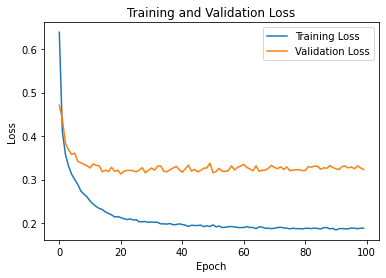

In [13]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Predicting using test dataset, and printing F1 score, precision, recall, accuracy

In [14]:
Y_pred = model.predict(X_test)
Y_pred = tf.nn.sigmoid(Y_pred)
Y_pred = Y_pred.numpy()
Y_pred = np.where(Y_pred<=0.5,0,1)
f1 = f1_score(Y_test, Y_pred)
precision = precision_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
print("F1 score:", f1)
print("Precision: ", precision)
print("Recall: ",recall)
print("Accuracy: ",accuracy)

312/312 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
F1 score: 0.9133627019089574
Precision:  0.902321083172147
Recall:  0.9246778989098117
Accuracy:  0.9112781954887218


Defining a function to predict the gender, given 2d numpy array of names

In [15]:
def predict(x_user):
    x_user = one_hot_encoding(name,23)
    x_user = normalized_model(x_user).numpy()
    x_user = x_user.reshape(x_user.shape[0],23*26)
    y_user = model.predict(x_user)
    y_user = tf.nn.sigmoid(y_user)
    y_user = y_user.numpy()
    #print(y_user)
    y_user = np.where(y_user>0.5,'F','M')
    return y_user

Predicting the gender, based on name by calling predict function and print name and gender

In [19]:
name = np.array([['Sweta'],['Shubham'],['Rohit'],['Anchal'],
                 ['Sakshi'],['Rahul'],['Gaurishankar'],
                 ['Radhe'],['Radha'],['Aryan'],['Ashwin'],['laddu'],['Nishtha'], ['Narayan']])
gender = predict(name)
for i in range(name.shape[0]):
    print(f'{name[i,0]}\t{gender[i,0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Sweta	F
Shubham	M
Rohit	M
Anchal	F
Sakshi	F
Rahul	M
Gaurishankar	M
Radhe	M
Radha	F
Aryan	M
Ashwin	M
laddu	F
Nishtha	F
Narayan	M


In [21]:
model.save('trained model')
normalized_model.save("normalized model")

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=trained model.